Import Libraries

In [12]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Prevent Seaborn Warnings

In [3]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

Read Dataset

In [4]:
gdf = gpd.read_file('../data/data_0.shp')

Check Dataset

In [5]:
gdf.head()

,ASSESSMENT,ID_NO,SCI_NAME,PRESENCE,ORIGIN,SEASONAL,COMPILER,YRCOMPILED,CITATION,LEGEND,SUBSPECIES,SUBPOP,DIST_COMM,ISLAND,TAX_COMM,geometry
0,18493355.0,6553.0,Dicerorhinus sumatrensis,1,1,1,IUCN,2020,IUCN (International Union for Conservation of ...,Extant (resident),None,None,This is very much a generalised polygon as the...,Borneo,None,"POLYGON ((116.58498 4.37977, 116.58807 4.37663..."
1,18493355.0,6553.0,Dicerorhinus sumatrensis,1,1,1,IUCN,2020,IUCN (International Union for Conservation of ...,Extant (resident),None,None,This is very much a generalised polygon as the...,Sumatra,None,"POLYGON ((95.52212 5.59443, 95.52212 5.59443, ..."
2,18493900.0,19495.0,Rhinoceros sondaicus,1,1,1,IUCN,2020,IUCN (International Union for Conservation of ...,Extant (resident),None,None,None,Java,None,"POLYGON ((112.58089 -6.92902, 112.57632 -6.928..."
3,18494149.0,19496.0,Rhinoceros unicornis,1,1,1,IUCN,2019,IUCN (International Union for Conservation of ...,Extant (resident),None,None,Distribution at country level. Data sensitive,None,None,"MULTIPOLYGON (((88.32126 20.86965, 88.32126 20..."
4,45813880.0,4185.0,Ceratotherium simum,1,1,1,IUCN (International Union for Conservation of ...,2020,IUCN (International Union for Conservation of ...,Extant (resident),simum,None,None,None,None,"POLYGON ((31.3113 -22.41776, 31.3063 -22.42086..."


Check number of records

In [6]:
gdf.shape

(23, 16)

Check Data Types for columns

In [6]:
gdf.dtypes

ASSESSMENT     float64
ID_NO          float64
SCI_NAME        object
PRESENCE         int64
ORIGIN           int64
SEASONAL         int64
COMPILER        object
YRCOMPILED       int64
CITATION        object
LEGEND          object
SUBSPECIES      object
SUBPOP          object
DIST_COMM       object
ISLAND          object
TAX_COMM        object
geometry      geometry
dtype: object

Distribution of species in sample

<Axes: ylabel='count'>

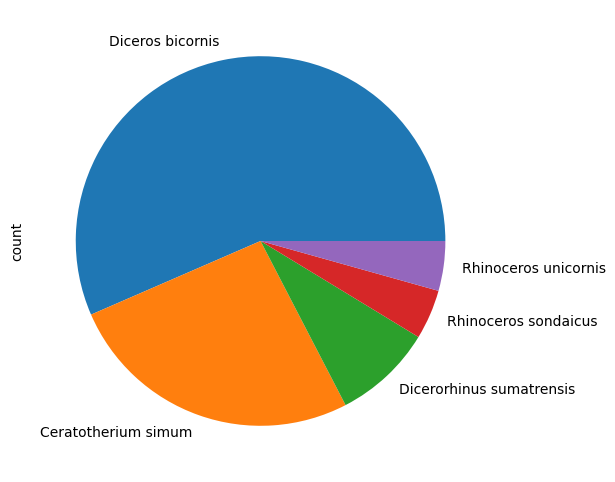

In [8]:
gdf['SCI_NAME'].value_counts().plot(kind='pie', figsize=(6,6))

Number of Sightings in sample

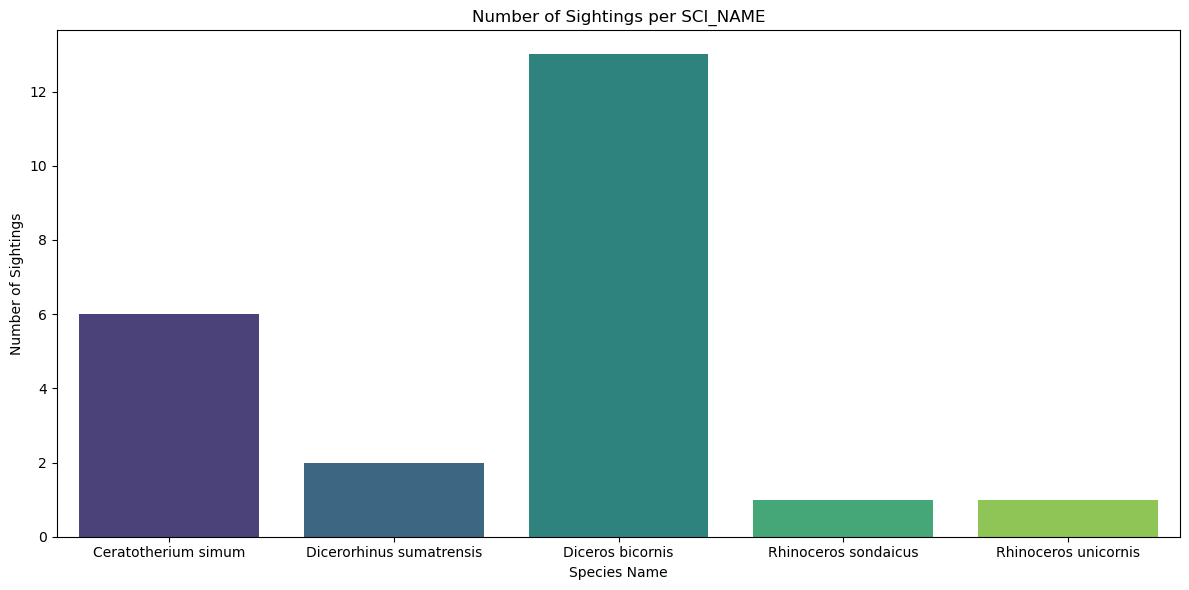

In [15]:
sightings_count = gdf.groupby('SCI_NAME').size().reset_index(name='COUNT')

plt.figure(figsize=(12, 6))
sns.barplot(data=sightings_count, x='SCI_NAME', y='COUNT', palette='viridis')

plt.title('Number of Sightings per SCI_NAME')
plt.xlabel('Species Name')
plt.ylabel('Number of Sightings')
plt.tight_layout()
plt.show()


Map of Sightings

<Figure size 10000x10000 with 0 Axes>

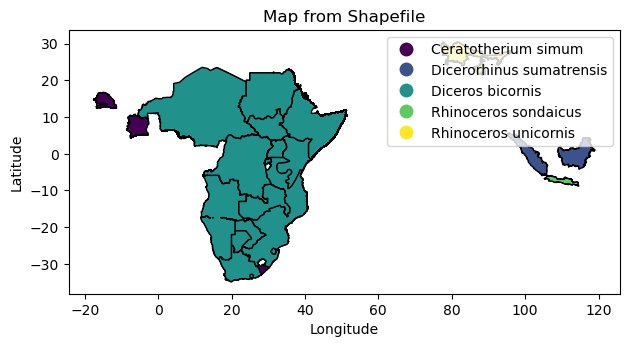

In [31]:
plt.figure(figsize=(100, 100))
gdf.plot(column='SCI_NAME',  
         cmap='viridis',  
         legend=True,  
         edgecolor='black')  # 

plt.title('Map from Shapefile')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()